In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('newlatlongdata.csv')

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [4]:
df

,logger_ID,files,LAT,LON,Owner,folders,data_location,New_Site_Code,image
0,CR200_1,E:\Soil_Moisture\Codes\website\LoggerNet\CR200...,30.437585,-98.805859,TxSON,CR200_1,\\coastal\soilmoisture_sitedata\raw_data\CR200...,CB02,CB03.jpg
1,CR200_2,E:\Soil_Moisture\Codes\website\LoggerNet\CR200...,30.289700,-98.746156,TxSON,CR200_2,\\coastal\soilmoisture_sitedata\raw_data\CR200...,SW04,SW04.jpg
2,CR200_3,E:\Soil_Moisture\Codes\website\LoggerNet\CR200...,30.428332,-98.806510,TxSON,CR200_3,\\coastal\soilmoisture_sitedata\raw_data\CR200...,CB08,CB08.jpg
3,CR200_4,E:\Soil_Moisture\Codes\website\LoggerNet\CR200...,30.429788,-98.779219,TxSON,CR200_4,\\coastal\soilmoisture_sitedata\raw_data\CR200...,FD09,BR03.jpg
4,CR200_5,E:\Soil_Moisture\Codes\website\LoggerNet\CR200...,30.238091,-98.770115,TxSON,CR200_5,\\coastal\soilmoisture_sitedata\raw_data\CR200...,WLD2,FD06.jpg
...,...,...,...,...,...,...,...,...,...
81,DMF6_1,E:\Soil_Moisture\Codes\website\LoggerNet\DMF6_...,33.235006,-100.823014,DMF,DMF6_1,\\coastal\soilmoisture_sitedata\raw_data\DMF6_...,SF1U,SF1U.jpg
82,DMF6_2,E:\Soil_Moisture\Codes\website\LoggerNet\DMF6_...,33.236328,-100.823493,DMF,DMF6_2,\\coastal\soilmoisture_sitedata\raw_data\DMF6_...,SF1M,SF1M.jpg
83,DMF6_3,E:\Soil_Moisture\Codes\website\LoggerNet\DMF6_...,33.236241,-100.822823,DMF,DMF6_3,\\coastal\soilmoisture_sitedata\raw_data\DMF6_...,SF1L,SF1L.jpg
84,CR300_20_TRACER4,E:\Soil_Moisture\Codes\website\LoggerNet\CR300...,29.329231,-95.740396,TxSON,CR300_20,\\coastal\soilmoisture_sitedata\raw_data\CR300...,GUYT,GUYT.jpg


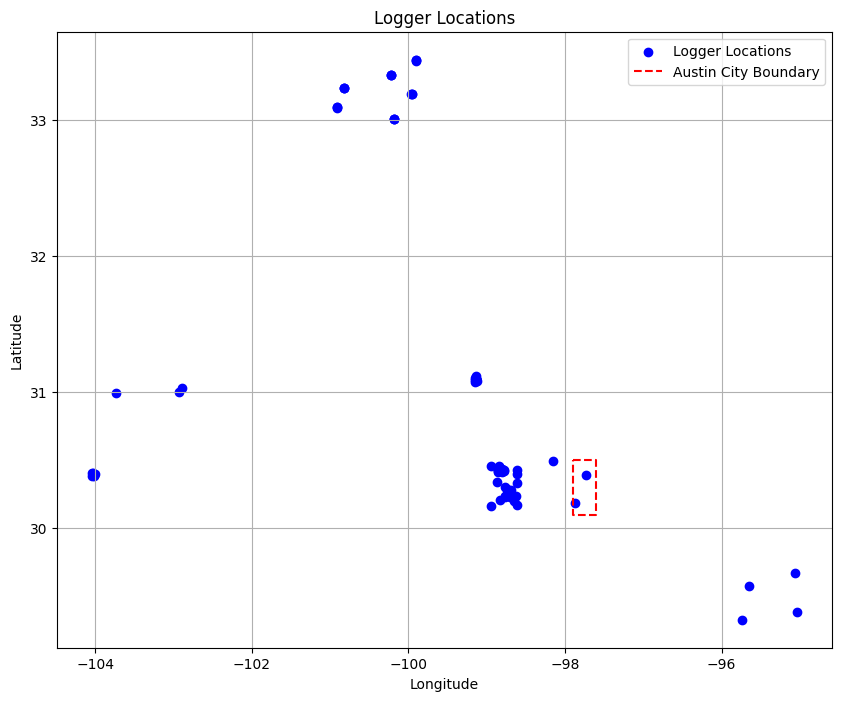

In [5]:
# Plotting the locations
plt.figure(figsize=(10, 8))
plt.scatter(df['LON'], df['LAT'], c='blue', marker='o', label='Logger Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Logger Locations')

# Adding city boundaries (assuming Austin, Texas for example)
# This would usually be more complex and require a shapefile, but we'll simulate with a simple rectangle
austin_boundary = {
    'lat': [30.5, 30.5, 30.1, 30.1, 30.5],
    'lon': [-97.9, -97.6, -97.6, -97.9, -97.9]
}
plt.plot(austin_boundary['lon'], austin_boundary['lat'], 'r--', label='Austin City Boundary')

plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Define the boundary of Austin, Texas (a more precise polygon could be used with actual city data)
austin_boundary = {
    'min_lat': 30.1,
    'max_lat': 30.5,
    'min_lon': -97.9,
    'max_lon': -97.6
}

# Filter the DataFrame to find loggers within the specified boundary
in_boundary = df[(df['LAT'] >= austin_boundary['min_lat']) & (df['LAT'] <= austin_boundary['max_lat']) &
                 (df['LON'] >= austin_boundary['min_lon']) & (df['LON'] <= austin_boundary['max_lon'])]

# Display the names of the stations within the boundary
in_boundary_logger_ids = in_boundary['logger_ID'].tolist()
in_boundary_logger_ids


['CR200_20', 'CR300_GardenTestStation_Hourly']

In [7]:
df1 = pd.read_csv('raw_data/CR200_20_Hourly.dat')
df1

/tmp/ipykernel_956470/1021545452.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('raw_data/CR200_20_Hourly.dat')


,,,,,TOA5,CR300_AU34,CR300,26682,CR300.Std.10.07,CPU:AU51_v3.CR300,19192,Hourly
TIMESTAMP,RECORD,Rain_mm_Tot,VWC_1_Avg,VWC_2_Avg,VWC_3_Avg,T_1_Avg,T_2_Avg,T_3_Avg,EC_1_Avg,EC_2_Avg,EC_3_Avg,BattV_Min
TS,RN,mm,m^3/m^3,m^3/m^3,m^3/m^3,Deg C,Deg C,Deg C,dS/m,dS/m,dS/m,Volts
NaN,NaN,Tot,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Avg,Min
2014-11-04 13:00:00,0,0,0.1349695,0.258024,0.3662957,18.50414,18.19493,17.94201,0.06534594,0.1926624,0.4707757,NaN
2014-11-04 14:00:00,1,0,0.1651764,0.3147255,0.4470938,22.55304,22.06998,21.7527,0.08060895,0.2365098,0.5758719,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31 10:00:00,6189,0.0,0.296,0.369,0.51,28.01,27.9,27.92,0.217,0.341,0.771,13.41
2024-07-31 11:00:00,6190,0.0,0.296,0.368,0.509,28.73,28.21,27.91,0.216,0.333,0.77,13.38
2024-07-31 12:00:00,6191,0.0,0.295,0.367,0.509,29.53,28.68,27.95,0.215,0.324,0.769,13.35
2024-07-31 13:00:00,6192,0.0,0.294,0.365,0.508,30.47,29.27,28.05,0.215,0.318,0.767,13.35


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the column names
column_names = [
    'TIMESTAMP', 'RECORD', 'Rain_mm_Tot', 'VWC_1_Avg', 'VWC_2_Avg', 'VWC_3_Avg', 
    'T_1_Avg', 'T_2_Avg', 'T_3_Avg', 'EC_1_Avg', 'EC_2_Avg', 'EC_3_Avg', 'BattV_Min'
]

# Read the CSV file, skipping the first 4 lines
df1 = pd.read_csv('raw_data/CR200_20_Hourly.dat', skiprows=4, names=column_names, low_memory=False)

# Convert the TIMESTAMP column to datetime
df1['TIMESTAMP'] = pd.to_datetime(df1['TIMESTAMP'])

# Set the TIMESTAMP column as the index
df1.set_index('TIMESTAMP', inplace=True)

# Convert the relevant columns to numeric
columns_to_convert = [
    'Rain_mm_Tot', 'VWC_1_Avg', 'VWC_2_Avg', 'VWC_3_Avg', 
    'T_1_Avg', 'T_2_Avg', 'T_3_Avg', 'EC_1_Avg', 'EC_2_Avg', 'EC_3_Avg', 'BattV_Min'
]

df1[columns_to_convert] = df1[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Replace values greater than 1 in VWC columns with NaN
vwc_columns = ['VWC_1_Avg', 'VWC_2_Avg', 'VWC_3_Avg']
df1[vwc_columns] = df1[vwc_columns].mask(df1[vwc_columns] > 1)


df1

,RECORD,Rain_mm_Tot,VWC_1_Avg,VWC_2_Avg,VWC_3_Avg,T_1_Avg,T_2_Avg,T_3_Avg,EC_1_Avg,EC_2_Avg,EC_3_Avg,BattV_Min
TIMESTAMP,,,,,,,,,,,,
2014-11-04 13:00:00,0,0.0,0.134969,0.258024,0.366296,18.50414,18.19493,17.94201,0.065346,0.192662,0.470776,NaN
2014-11-04 14:00:00,1,0.0,0.165176,0.314725,0.447094,22.55304,22.06998,21.75270,0.080609,0.236510,0.575872,NaN
2014-11-04 15:00:00,2,0.0,0.165123,0.315308,0.447200,22.46066,22.02336,21.66399,0.080926,0.237551,0.577742,NaN
2014-11-04 16:00:00,3,0.0,0.164619,0.315283,0.447635,22.38601,21.98068,21.62372,0.081091,0.237467,0.579636,NaN
2014-11-04 17:00:00,4,0.0,0.164831,0.315283,0.447651,22.35487,21.97866,21.62033,0.081200,0.237860,0.580525,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31 10:00:00,6189,0.0,0.296000,0.369000,0.510000,28.01000,27.90000,27.92000,0.217000,0.341000,0.771000,13.41
2024-07-31 11:00:00,6190,0.0,0.296000,0.368000,0.509000,28.73000,28.21000,27.91000,0.216000,0.333000,0.770000,13.38
2024-07-31 12:00:00,6191,0.0,0.295000,0.367000,0.509000,29.53000,28.68000,27.95000,0.215000,0.324000,0.769000,13.35


<Axes: xlabel='TIMESTAMP'>

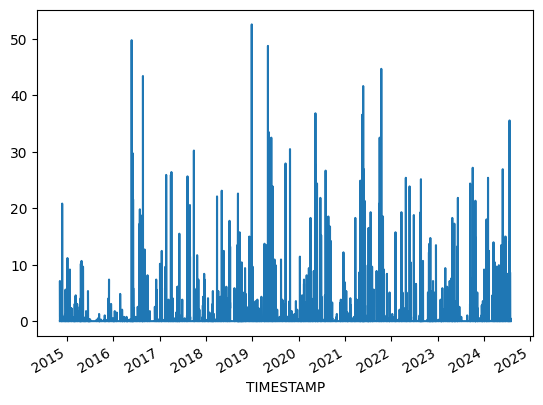

In [9]:
df1.Rain_mm_Tot.plot()

<Axes: xlabel='TIMESTAMP'>

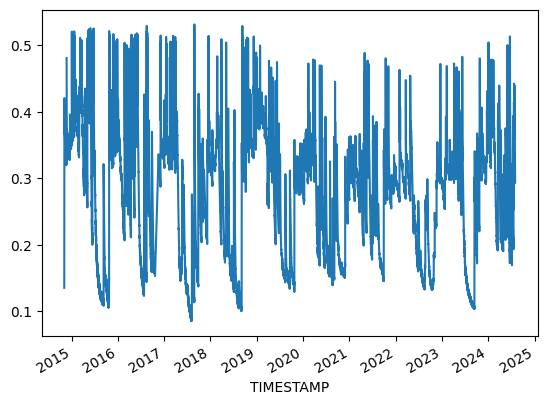

In [10]:
df1.VWC_1_Avg.plot()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the column names
column_names = [
    'TIMESTAMP', 'RECORD', 'Rain_mm_Tot', 'VWC_1_Avg', 'VWC_2_Avg', 'VWC_3_Avg', 
    'T_1_Avg', 'T_2_Avg', 'T_3_Avg', 'EC_1_Avg', 'EC_2_Avg', 'EC_3_Avg', 'BattV_Min'
]

# Read the CSV file, skipping the first 4 lines
df2 = pd.read_csv('raw_data/CR300_GardenTestStation_Hourly.dat', skiprows=4, names=column_names, low_memory=False)


# Convert the TIMESTAMP column to datetime
df2['TIMESTAMP'] = pd.to_datetime(df2['TIMESTAMP'])

# Set the TIMESTAMP column as the index
df2.set_index('TIMESTAMP', inplace=True)

# Convert the relevant columns to numeric
columns_to_convert = [
    'Rain_mm_Tot', 'VWC_1_Avg', 'VWC_2_Avg', 'VWC_3_Avg', 
    'T_1_Avg', 'T_2_Avg', 'T_3_Avg', 'EC_1_Avg', 'EC_2_Avg', 'EC_3_Avg', 'BattV_Min'
]

df2[columns_to_convert] = df2[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Replace values greater than 1 in VWC columns with NaN
vwc_columns = ['VWC_1_Avg', 'VWC_2_Avg', 'VWC_3_Avg']
df2[vwc_columns] = df2[vwc_columns].mask(df2[vwc_columns] > 1)


df2

,RECORD,Rain_mm_Tot,VWC_1_Avg,VWC_2_Avg,VWC_3_Avg,T_1_Avg,T_2_Avg,T_3_Avg,EC_1_Avg,EC_2_Avg,EC_3_Avg,BattV_Min
TIMESTAMP,,,,,,,,,,,,
2022-06-15 10:00:00,0,12.76,NaN,NaN,0.0,0.296,28.73,0.490,NaN,NaN,NaN,NaN
2022-06-15 11:00:00,1,13.07,NaN,NaN,0.0,0.290,28.84,0.484,NaN,NaN,NaN,NaN
2022-06-15 12:00:00,2,13.10,NaN,NaN,0.0,0.284,29.12,0.484,NaN,NaN,NaN,NaN
2022-06-15 13:00:00,3,13.25,NaN,NaN,0.0,0.280,29.53,0.483,NaN,NaN,NaN,NaN
2022-06-15 14:00:00,4,13.23,NaN,NaN,0.0,0.277,30.01,0.482,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31 10:00:00,18647,12.93,NaN,NaN,0.0,0.359,28.05,0.598,NaN,NaN,NaN,NaN
2024-07-31 11:00:00,18648,12.87,NaN,NaN,0.0,0.359,28.30,0.609,NaN,NaN,NaN,NaN
2024-07-31 12:00:00,18649,13.24,NaN,NaN,0.0,0.359,28.95,0.611,NaN,NaN,NaN,NaN


<Axes: xlabel='TIMESTAMP'>

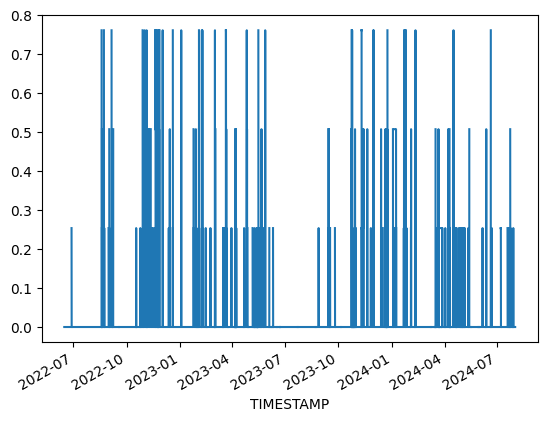

In [12]:
df2.VWC_3_Avg.plot()

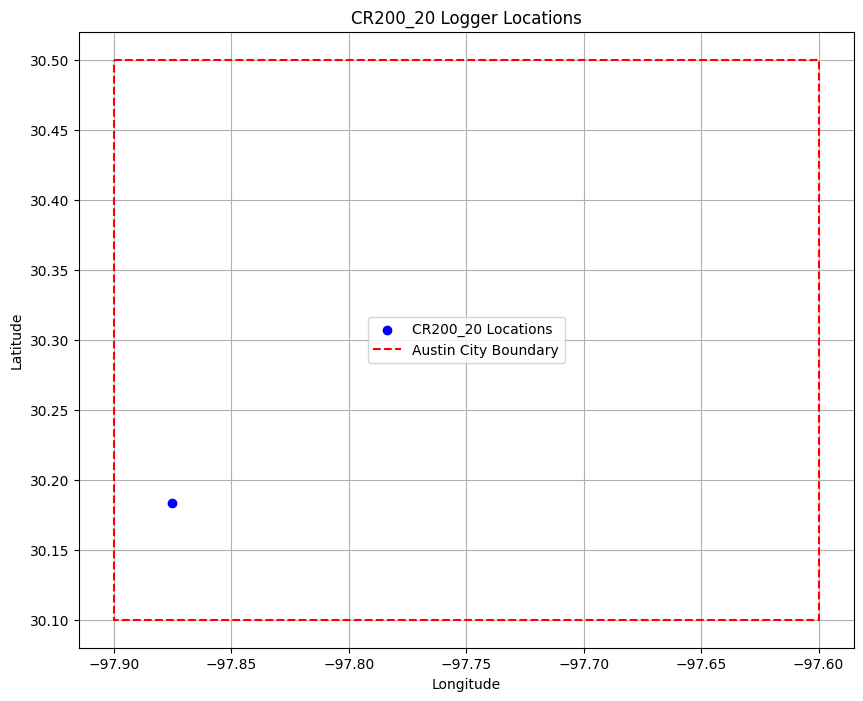

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# # Sample data to simulate the logger locations
# data = {
#     'Station': ['CR200_20', 'CR200_20', 'Other_Station', 'Other_Station'],
#     'LAT': [30.3, 30.4, 30.2, 30.6],
#     'LON': [-97.7, -97.8, -97.5, -97.9]
# }
# df = pd.DataFrame(data)

# Filter the data to include only the CR200_20 station
cr200_20_df = df[df['folders'] == 'CR200_20']

# Plotting the locations
plt.figure(figsize=(10, 8))
plt.scatter(cr200_20_df['LON'], cr200_20_df['LAT'], c='blue', marker='o', label='CR200_20 Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('CR200_20 Logger Locations')

# Adding city boundaries (assuming Austin, Texas for example)
austin_boundary = {
    'lat': [30.5, 30.5, 30.1, 30.1, 30.5],
    'lon': [-97.9, -97.6, -97.6, -97.9, -97.9]
}
plt.plot(austin_boundary['lon'], austin_boundary['lat'], 'r--', label='Austin City Boundary')

plt.legend()
plt.grid(True)
plt.show()


In [14]:
cr200_20_df
target_lat = cr200_20_df.LAT.values[0]
target_lon = cr200_20_df.LON.values[0]
print(target_lat, target_lon)



30.183587 -97.8752478


In [15]:
import xarray as xr
ds_wfw = xr.open_mfdataset('/mnt/flood_masks/dynamic_world_water_flooded_vegetation_2015_2023.nc')

In [16]:
# Modify the time coordinate to set hours and minutes to 00:00
if 'time' in ds_wfw.coords:
    original_time = ds_wfw['time'].values
    modified_time = [pd.Timestamp(t).replace(minute=0, second=0) for t in original_time]
    ds_wfw['time'] = modified_time

# Display the modified dataset
print("\nModified Dataset with time set to 00:00:")
print(ds_wfw)


Modified Dataset with time set to 00:00:
<xarray.Dataset> Size: 21GB
Dimensions:      (time: 526, x: 2227, y: 2228)
Coordinates:
  * time         (time) datetime64[ns] 4kB 2015-08-06T17:00:00 ... 2023-12-30...
  * x            (x) float64 18kB -97.8 -97.8 -97.8 -97.8 ... -97.6 -97.6 -97.6
  * y            (y) float64 18kB 30.37 30.37 30.37 30.37 ... 30.17 30.17 30.17
    spatial_ref  int64 8B ...
Data variables:
    water        (time, y, x) float64 21GB dask.array<chunksize=(526, 2228, 2227), meta=np.ndarray>


In [17]:
# ds_wfw.to_netcdf('dynamic_world_water_flooded_vegetation_2015_2023.nc')

In [18]:
ds_wfw.time.values

array(['2015-08-06T17:00:00.000000000', '2015-08-16T17:00:00.000000000',
       '2015-12-04T17:00:00.000000000', '2015-12-04T17:00:00.000000000',
       '2015-12-17T17:00:00.000000000', '2016-01-03T17:00:00.000000000',
       '2016-01-13T17:00:00.000000000', '2016-01-23T17:00:00.000000000',
       '2016-02-02T17:00:00.000000000', '2016-02-12T17:00:00.000000000',
       '2016-02-15T17:00:00.000000000', '2016-03-03T17:00:00.000000000',
       '2016-03-13T17:00:00.000000000', '2016-03-16T17:00:00.000000000',
       '2016-04-02T17:00:00.000000000', '2016-04-15T17:00:00.000000000',
       '2016-04-22T17:00:00.000000000', '2016-05-05T17:00:00.000000000',
       '2016-06-01T17:00:00.000000000', '2016-06-11T17:00:00.000000000',
       '2016-06-21T17:00:00.000000000', '2016-07-01T17:00:00.000000000',
       '2016-07-11T17:00:00.000000000', '2016-07-21T17:00:00.000000000',
       '2016-07-24T17:00:00.000000000', '2016-08-10T17:00:00.000000000',
       '2016-09-09T17:00:00.000000000', '2016-09-19

In [19]:
df1.index.values

array(['2014-11-04T13:00:00.000000000', '2014-11-04T14:00:00.000000000',
       '2014-11-04T15:00:00.000000000', ...,
       '2024-07-31T12:00:00.000000000', '2024-07-31T13:00:00.000000000',
       '2024-07-31T14:00:00.000000000'], dtype='datetime64[ns]')

In [20]:
import xarray as xr
import dask.array as da
import numpy as np

time_dim = len(df1.index.values)
y_dim = len(ds_wfw['y'].values)
x_dim = len(ds_wfw['x'].values)

# # Create a Dask array with the desired shape
# new_data = da.zeros((time_dim, y_dim, x_dim), chunks=(100, 100, 100))

# Create a Dask array with the desired shape filled with NaNs
new_data = da.full((time_dim, y_dim, x_dim), np.nan, chunks=(100, 100, 100))


ds_txson = xr.Dataset(
    {
        "sm_txson": (("time", "y", "x"), new_data)
    },
    coords={
        "y": ds_wfw['y'],
        "x": ds_wfw['x'],
        "time": df1.index.values
    }
)

In [21]:
# Extract the latitude and longitude values from the dataset
latitudes = ds_wfw['y'].values
longitudes = ds_wfw['x'].values

# Create 2D arrays of latitudes and longitudes
lat_2d, lon_2d = np.meshgrid(latitudes, longitudes, indexing='ij')

# Calculate the squared distance to the target coordinates
distances = (lat_2d - target_lat)**2 + (lon_2d - target_lon)**2

# Find the index of the minimum distance
min_dist_idx = np.unravel_index(np.argmin(distances), distances.shape)

# Get the nearest latitude and longitude indices
nearest_lat_idx = min_dist_idx[0]
nearest_lon_idx = min_dist_idx[1]

print(f"Nearest latitude index: {nearest_lat_idx}, Nearest longitude index: {nearest_lon_idx}")

Nearest latitude index: 2044, Nearest longitude index: 0


In [22]:
# Assign the value to the nearest grid point
ds_txson.sm_txson[:, nearest_lat_idx, nearest_lon_idx] = df1.VWC_1_Avg.values

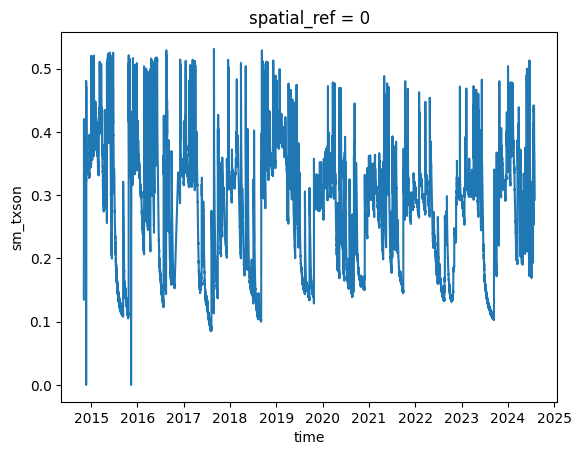

In [23]:
ds_txson.sm_txson.sum(dim='y').sum(dim='x').plot()

In [24]:
rain_txson = df1.Rain_mm_Tot.values
print(np.max(rain_txson), np.min(rain_txson))
rain_ = rain_txson / np.max(rain_txson)

52.57811 0.0


In [25]:
ds_txson['pr_txson'] = (("time", "y", "x"), new_data)
ds_txson.pr_txson[:, nearest_lat_idx, nearest_lon_idx] = rain_

# So soil moisture are actual values and precipitation is scaled by max values

In [26]:
ds_txson

<xarray.Dataset> Size: 7TB
Dimensions:      (time: 84677, y: 2228, x: 2227)
Coordinates:
  * y            (y) float64 18kB 30.37 30.37 30.37 30.37 ... 30.17 30.17 30.17
    spatial_ref  int64 8B 0
  * x            (x) float64 18kB -97.8 -97.8 -97.8 -97.8 ... -97.6 -97.6 -97.6
  * time         (time) datetime64[ns] 677kB 2014-11-04T13:00:00 ... 2024-07-...
Data variables:
    sm_txson     (time, y, x) float64 3TB dask.array<chunksize=(100, 100, 100), meta=np.ndarray>
    pr_txson     (time, y, x) float64 3TB dask.array<chunksize=(100, 100, 100), meta=np.ndarray>

In [27]:
import xarray as xr
import pandas as pd

# Remove duplicate time values by keeping the first occurrence
ds_txson_unique = ds_txson.sel(time=~ds_txson.indexes['time'].duplicated())

# # Generate a continuous hourly time range from the minimum to the maximum time in the dataset
# time_range = pd.date_range(start=ds_txson_unique.time.min().values, end=ds_txson_unique.time.max().values, freq='H')

# # Reindex the dataset to the new continuous time range
# ds_filled = ds_txson_unique.reindex({'time': time_range}, fill_value=0)

# Check the result
print(ds_filled)

/tmp/ipykernel_956470/249870483.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_range = pd.date_range(start=ds_txson_unique.time.min().values, end=ds_txson_unique.time.max().values, freq='H')
/usr/local/lib/python3.10/dist-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 23
  result = blockwise(
/usr/local/lib/python3.10/dist-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 23
  result = blockwise(


<xarray.Dataset> Size: 7TB
Dimensions:      (y: 2228, x: 2227, time: 85370)
Coordinates:
  * y            (y) float64 18kB 30.37 30.37 30.37 30.37 ... 30.17 30.17 30.17
  * x            (x) float64 18kB -97.8 -97.8 -97.8 -97.8 ... -97.6 -97.6 -97.6
  * time         (time) datetime64[ns] 683kB 2014-11-04T13:00:00 ... 2024-07-...
    spatial_ref  int64 8B 0
Data variables:
    sm_txson     (time, y, x) float64 3TB dask.array<chunksize=(100, 100, 100), meta=np.ndarray>
    pr_txson     (time, y, x) float64 3TB dask.array<chunksize=(100, 100, 100), meta=np.ndarray>


/usr/local/lib/python3.10/dist-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 23
  result = blockwise(
/usr/local/lib/python3.10/dist-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 23
  result = blockwise(


In [28]:
# ds_filled.sum(dim='y').sum(dim='x').pr_txson.plot()

In [29]:
# ds_filled.sum(dim='y').sum(dim='x').sm_txson.plot()

In [30]:
ds_filled['mask'] = ds_filled['sm_txson'].copy()
ds_filled

<xarray.Dataset> Size: 10TB
Dimensions:      (y: 2228, x: 2227, time: 85370)
Coordinates:
  * y            (y) float64 18kB 30.37 30.37 30.37 30.37 ... 30.17 30.17 30.17
  * x            (x) float64 18kB -97.8 -97.8 -97.8 -97.8 ... -97.6 -97.6 -97.6
  * time         (time) datetime64[ns] 683kB 2014-11-04T13:00:00 ... 2024-07-...
    spatial_ref  int64 8B 0
Data variables:
    sm_txson     (time, y, x) float64 3TB dask.array<chunksize=(100, 100, 100), meta=np.ndarray>
    pr_txson     (time, y, x) float64 3TB dask.array<chunksize=(100, 100, 100), meta=np.ndarray>
    mask         (time, y, x) float64 3TB dask.array<chunksize=(100, 100, 100), meta=np.ndarray>

In [31]:
# Replace all valid values with 1, keep NaNs as they are for the 'temperature' variable
ds_filled['mask'] = ds_filled['mask'].where(ds_filled['mask'].isnull(), 1)
ds_filled['mask'] = ds_filled['mask'].fillna(0)
ds_filled['sm_txson'] = ds_filled['sm_txson'].fillna(0)
ds_filled['pr_txson'] = ds_filled['pr_txson'].fillna(0)


In [32]:
# ds_filled.sm_txson.sum(dim='time').plot(cmap='Blues')

In [33]:
ds_filled

<xarray.Dataset> Size: 10TB
Dimensions:      (y: 2228, x: 2227, time: 85370)
Coordinates:
  * y            (y) float64 18kB 30.37 30.37 30.37 30.37 ... 30.17 30.17 30.17
  * x            (x) float64 18kB -97.8 -97.8 -97.8 -97.8 ... -97.6 -97.6 -97.6
  * time         (time) datetime64[ns] 683kB 2014-11-04T13:00:00 ... 2024-07-...
    spatial_ref  int64 8B 0
Data variables:
    sm_txson     (time, y, x) float64 3TB dask.array<chunksize=(100, 100, 100), meta=np.ndarray>
    pr_txson     (time, y, x) float64 3TB dask.array<chunksize=(100, 100, 100), meta=np.ndarray>
    mask         (time, y, x) float64 3TB dask.array<chunksize=(100, 100, 100), meta=np.ndarray>

In [34]:
# Example chunksize
new_chunksize = {'time': 500, 'y': 500, 'x': 500}

# Rechunk the dataset
ds_filled_chunked = ds_filled.chunk(new_chunksize)

# Save the chunked dataset
ds_filled_chunked.to_netcdf('path_to_save_file.nc')

: 

In [118]:
!pwd

/mnt/flood_masks
